# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_result = study_results.merge(mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
full_result.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [58]:
# Checking the number of mice.
full_result['Mouse ID'].nunique()

249

In [59]:
# full_result['Mouse ID'][full_result.duplicated(keep='last')]
full_result['Mouse ID'][full_result.duplicated(keep='last')].to_numpy()


array(['g989'], dtype=object)

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
full_result['Mouse ID'][full_result.duplicated(keep='last')].to_numpy()

array(['g989'], dtype=object)

In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
# full_result[full_result.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
full_result.where(full_result['Mouse ID'] == 'g989').dropna()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0.0,45.000000,0.0,Propriva,Female,21.0,26.0
137,g989,0.0,45.000000,0.0,Propriva,Female,21.0,26.0
329,g989,5.0,48.786801,0.0,Propriva,Female,21.0,26.0
360,g989,5.0,47.570392,0.0,Propriva,Female,21.0,26.0
620,g989,10.0,51.745156,0.0,Propriva,Female,21.0,26.0
681,g989,10.0,49.880528,0.0,Propriva,Female,21.0,26.0
815,g989,15.0,51.325852,1.0,Propriva,Female,21.0,26.0
869,g989,15.0,53.442020,0.0,Propriva,Female,21.0,26.0
950,g989,20.0,55.326122,1.0,Propriva,Female,21.0,26.0
1111,g989,20.0,54.657650,1.0,Propriva,Female,21.0,26.0


In [62]:
full_result.where(full_result['Mouse ID'] == 'g989').dropna()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0.0,45.000000,0.0,Propriva,Female,21.0,26.0
137,g989,0.0,45.000000,0.0,Propriva,Female,21.0,26.0
329,g989,5.0,48.786801,0.0,Propriva,Female,21.0,26.0
360,g989,5.0,47.570392,0.0,Propriva,Female,21.0,26.0
620,g989,10.0,51.745156,0.0,Propriva,Female,21.0,26.0
681,g989,10.0,49.880528,0.0,Propriva,Female,21.0,26.0
815,g989,15.0,51.325852,1.0,Propriva,Female,21.0,26.0
869,g989,15.0,53.442020,0.0,Propriva,Female,21.0,26.0
950,g989,20.0,55.326122,1.0,Propriva,Female,21.0,26.0
1111,g989,20.0,54.657650,1.0,Propriva,Female,21.0,26.0


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
temp = full_result.where(full_result['Mouse ID'] == 'g989').dropna().index
clean_results = full_result
for x in temp: 
    clean_results = clean_results.drop([x])

clean_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
temp = full_result.where(full_result['Mouse ID'] == 'g989').dropna().index
temp
for x in temp: 
    print(x)

107
137
329
360
620
681
815
869
950
1111
1195
1380
1592


In [65]:
# clean_results = full_result.drop_duplicates(subset=['Mouse ID'], keep='first')
# clean_results = full_result.drop(full_result.where(full_result['Mouse ID'] == 'g989'))
temp = full_result.where(full_result['Mouse ID'] == 'g989').dropna().index
clean_results = full_result
for x in temp: 
    print(x)
    clean_results = clean_results.drop([x])
clean_results['Mouse ID'].nunique()
#clean_results
# clean_results['Mouse ID'].value_counts()

107
137
329
360
620
681
815
869
950
1111
1195
1380
1592


248

In [66]:
# Checking the number of mice in the clean DataFrame.
clean_results['Mouse ID'].nunique()

248

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_TV = clean_results.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
Median_TV = clean_results.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
TV_V = clean_results.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
TV_SD =  clean_results.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
TV_SE = clean_results.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


results_summary = pd.DataFrame({'Mean Tumor Volume' :Mean_TV,
                        'Median Tumor Volume' :Median_TV,
                        'Tumor Volume Variance' :TV_V,
                        'Tumor Volume Std. Dev.' :TV_SD,
                        'Tumor Volume Std. Err.' :TV_SE
                        })

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
results_summary


C:\Users\icanhearme\AppData\Local\Temp\ipykernel_32984\2316320446.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Mean_TV = clean_results.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
C:\Users\icanhearme\AppData\Local\Temp\ipykernel_32984\2316320446.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Median_TV = clean_results.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
C:\Users\icanhearme\AppData\Local\Temp\ipykernel_32984\2316320446.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to Fals

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_results.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot: xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

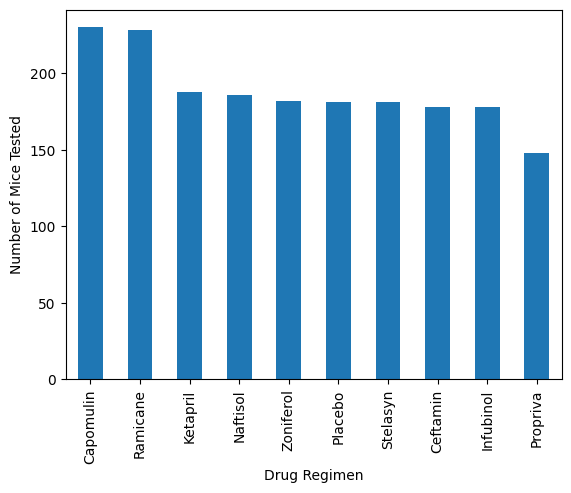

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
t = clean_results.groupby(['Drug Regimen']).size()
t = t.sort_values(ascending=False)

t = clean_results.groupby(['Drug Regimen']).size()
t = t.sort_values(ascending=False)


t.plot.bar(x=t.index, y=t.values, rot=90, ylabel='Number of Mice Tested')



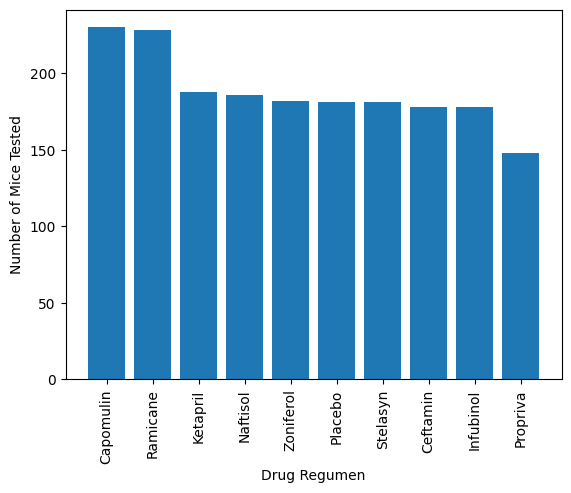

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# t = clean_results.groupby(['Drug Regimen']).size()
# t = t.sort_values(ascending=False)
x_axis = t.index
y_axis = t.values

plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regumen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()


<AxesSubplot: ylabel='Sex'>

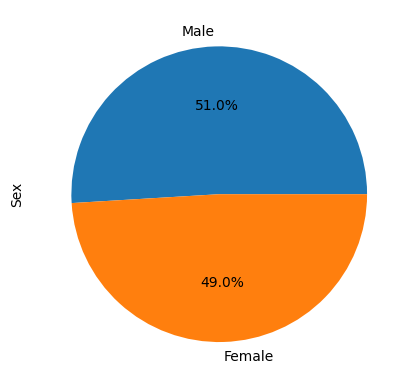

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
t = clean_results.groupby(['Sex']).size()
t = t.sort_values(ascending=False)

# t.plot.pie(y=t.values, autopct='%1.1f%%')

clean_results['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%',)

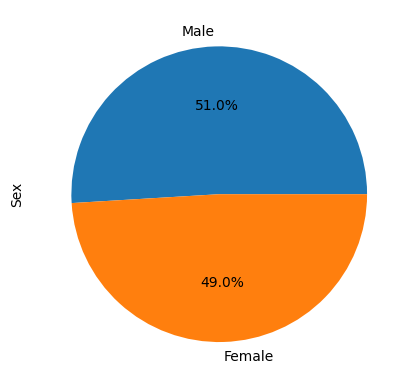

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = clean_results['Sex'].value_counts()
labels = clean_results['Sex'].value_counts().index

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin
# final_tv = clean_results.groupby(['Drug Regimen']).max()['Tumor Volume (mm3)'].iloc[[0,1,2,7]]
# print(final_tv)
# # Start by getting the last (greatest) timepoint for each mouse
# last_tp = clean_results.groupby(['Mouse ID']).max()['Timepoint']
# print(last_tp)

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# clean_res = clean_results
# clean_res['Treatment Regimens'] = last_tp
# clean_res

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# print(clean_results.groupby('Mouse ID')['Drug Regimen','Tumor Volume (mm3)'].max())
cr = clean_results.groupby('Mouse ID')['Drug Regimen','Tumor Volume (mm3)'].max()
cond1 = cr['Drug Regimen'] == 'Capomulin'
cond2 = cr['Drug Regimen'] == 'Ramicane'
cond3 = cr['Drug Regimen'] == 'Infubinol'
cond4 = cr['Drug Regimen'] == 'Ceftamin'


# ftv = cr.where(cond1 | cond2 | cond3 | cond4).dropna()
ftv = pd.DataFrame(cr.where(cond1 | cond2 | cond3 | cond4).dropna())
print(ftv)
# print(clean_results.where(clean_results['Mouse ID'] == 'a366').dropna())
# Start by getting the last (greatest) timepoint for each mouse

# gtp = clean_results.groupby('Mouse ID')['Timepoint'].max()
gtp = pd.DataFrame(clean_results.groupby('Mouse ID')['Timepoint'].max())
print(gtp)
pd.DataFrame(gtp)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tv = ftv.merge(gtp, on='Mouse ID', how='left')
tv.head(25)

         Drug Regimen  Tumor Volume (mm3)
Mouse ID                                 
a203        Infubinol           67.973419
a251        Infubinol           65.525743
a275         Ceftamin           62.999356
a411         Ramicane           45.466677
a444         Ramicane           45.000000
...               ...                 ...
y769         Ceftamin           68.594745
y793        Capomulin           45.000000
y865         Ceftamin           64.729837
z578         Ramicane           45.000000
z581        Infubinol           62.754451

[100 rows x 2 columns]
          Timepoint
Mouse ID           
a203             45
a251             45
a262             45
a275             45
a366             30
...             ...
z435             10
z578             45
z581             45
z795             45
z969             45

[248 rows x 1 columns]


C:\Users\icanhearme\AppData\Local\Temp\ipykernel_32984\2121431188.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cr = clean_results.groupby('Mouse ID')['Drug Regimen','Tumor Volume (mm3)'].max()


,Drug Regimen,Tumor Volume (mm3),Timepoint
Mouse ID,,,
a203,Infubinol,67.973419,45
a251,Infubinol,65.525743,45
a275,Ceftamin,62.999356,45
a411,Ramicane,45.466677,45
a444,Ramicane,45.000000,45
a520,Ramicane,45.000000,45
a577,Infubinol,57.031862,30
a644,Ramicane,46.910892,45
a685,Infubinol,66.083066,45


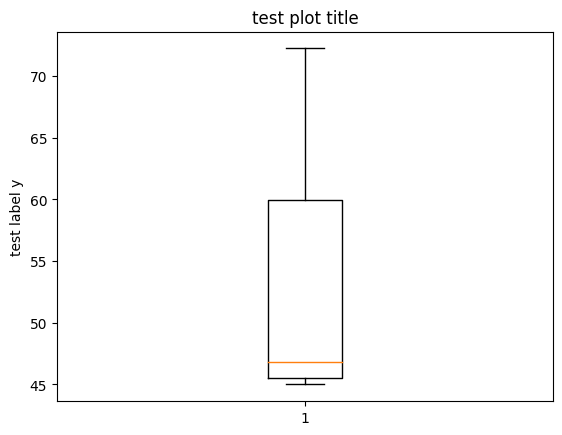

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_title('test plot title')
ax1.set_ylabel('test label y')
ax1.boxplot(tv['Tumor Volume (mm3)'])
plt.show()

In [22]:
# tv.groupby('Drug Regimen', group_keys=True).apply(lambda x: x)
tv.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
# type(tv)


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,25.0,46.119199,1.009485,45.0,45.000000,45.893720,46.749006,48.158209
Ceftamin,25.0,57.753977,8.365568,45.0,48.722078,59.851956,64.299830,68.923185
Infubinol,25.0,58.525392,7.824082,45.0,54.048608,60.165180,65.525743,72.226731
Ramicane,25.0,45.678645,0.766220,45.0,45.000000,45.521875,46.343832,47.622816


In [49]:
filter = tv['Drug Regimen'] == 'Capomulin'
tv.where(filter).dropna()


,Drug Regimen,Tumor Volume (mm3),Timepoint
Mouse ID,,,
b128,Capomulin,45.651331,45.0
b742,Capomulin,45.000000,45.0
f966,Capomulin,45.000000,20.0
g288,Capomulin,46.304003,45.0
g316,Capomulin,46.809225,45.0
i557,Capomulin,47.685963,45.0
i738,Capomulin,45.595685,45.0
j119,Capomulin,48.158209,45.0
j246,Capomulin,46.408361,35.0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


    Capomulin   Ramicane  Infubinol   Ceftamin
0   45.651331  45.466677  67.973419  62.999356
1   45.000000  45.000000  65.525743  45.000000
2   45.000000  45.000000  57.031862  56.057749
3   46.304003  46.910892  66.083066  55.742829
4   46.809225  45.722279  72.226731  48.722078
5   47.685963  46.940945  45.000000  47.784682
6   45.595685  45.000000  60.969711  61.849023
7   48.158209  46.409084  62.435404  68.923185
8   46.408361  45.851531  60.918767  67.748662
9   48.070452  45.000000  67.289621  57.918381
10  46.154737  45.000000  66.196912  46.784535
11  45.000000  45.252534  62.117279  59.851956
12  46.414518  46.343832  47.010364  64.299830
13  46.539206  45.000000  60.165180  59.741901
14  45.781746  45.000000  55.629428  61.433892
15  47.373423  45.521875  45.699331  64.192341
16  45.000000  45.766111  54.656549  45.000000
17  45.000000  46.585433  55.650681  52.925348
18  46.749006  45.625802  46.250112  45.000000
19  47.212200  45.568211  54.048608  67.527482
20  45.704434

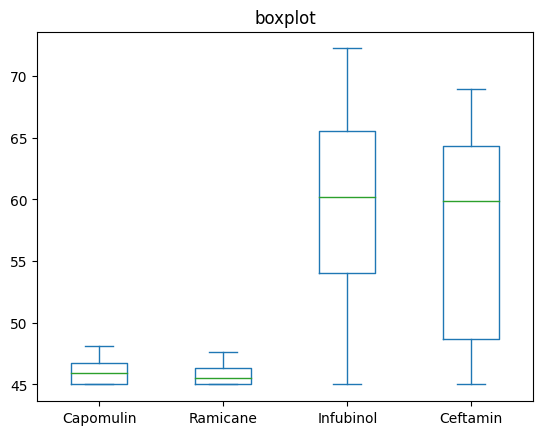

In [54]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# quartiles = tv.quantile([.25,.5, .75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

treatments_df = {}
for i in range(0, len(treatments)): 
    tumor_vol_data = tv['Tumor Volume (mm3)'].where(tv['Drug Regimen'] == treatments[i]).dropna()
    treatments_df[treatments[i]] = tumor_vol_data.values

treatments_df = pd.DataFrame(treatments_df)
print(treatments_df)

# fig, ax = plt.subplots()
# ax.boxplot(treatments_df)
# ax.set_xticklabels(treatments)
# plt.show()

# Plot the dataframe
ax = treatments_df[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

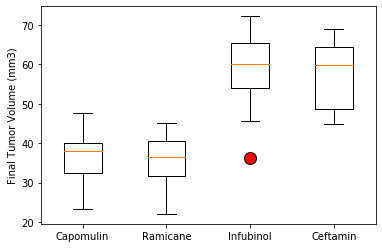

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

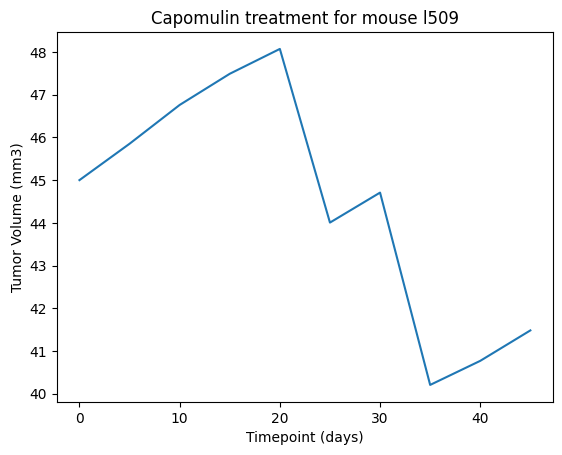

In [91]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = 'l509'
filter = clean_results['Mouse ID'] == mouse
filter2 = clean_results['Drug Regimen'] == 'Capomulin'
ndf = clean_results.where(filter & filter).dropna()
x_tp = ndf['Timepoint']
y_tv = ndf['Tumor Volume (mm3)']

plt.plot(x_tp, y_tv)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f"Capomulin treatment for mouse {mouse}")
plt.show()

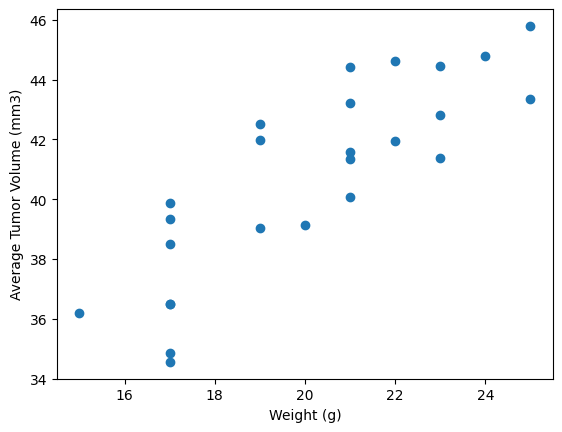

In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug = 'Capomulin'
filter = tv['Drug Regimen'] == drug

scplt = {'Average Tumor Volume (mm3)':[], 'Weight':[]}

ttv = tv.where(filter).dropna().reset_index()
# weight = 


for x in range(0, len(ttv)): 
    scplt['Average Tumor Volume (mm3)'].append(clean_results['Tumor Volume (mm3)'].where(clean_results['Mouse ID'] == ttv['Mouse ID'][x]).mean())
    scplt['Weight'].append(int(clean_results['Weight (g)'].where(clean_results['Mouse ID'] == ttv['Mouse ID'][x]).mean()))

# clean_results['Tumor Volume (mm3)'].where(clean_results['Mouse ID'] == ttv['Mouse ID'][0]).mean()
scplt = pd.DataFrame(scplt)

x = scplt['Weight']
y = scplt['Average Tumor Volume (mm3)']
plt.scatter(x, y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


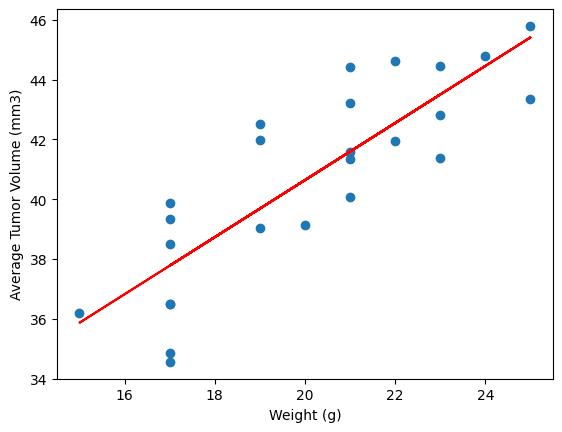

In [93]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = (x * slope) + intercept
print(f'The correlation between mouse weight and the average tumor volume is {rvalue:.2f}')
plt.scatter(x,y)
plt.plot(x,regress_values, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
